In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read Twitter Dataset 
df = pd.read_excel("TwitterDataset.xlsx", header=0)

C:\Users\rcuza\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [4]:
df.head(2)

,Tweet Id,Date,Hour,User Name,Nickname,Tweet content,Favs,RTs,Latitude,Longitude,Followers
0,721318437075685382,2016-04-16,12:44,Bill Schulhoff,BillSchulhoff,"Wind 3.2 mph NNE. Barometer 30.20 in, Rising s...",NaN,NaN,40.760278,-72.954722,386.0
1,721318436173979648,2016-04-16,12:44,Daniele Polis,danipolis,Pausa pro café antes de embarcar no próximo vô...,NaN,NaN,32.898349,-97.039196,812.0


In [5]:
df.columns

Index(['Tweet Id', 'Date', 'Hour', 'User Name', 'Nickname', 'Tweet content',
       'Favs', 'RTs', 'Latitude', 'Longitude', 'Followers'],
      dtype='object')

In [5]:
df.describe()

,Tweet Id,Favs,RTs,Latitude,Longitude,Followers
count,2.048200e+05,9201.000000,5216.000000,204820.000000,204820.000000,2.047590e+05
mean,7.209641e+17,3.320291,2.374041,35.396519,-92.227365,2.802942e+03
std,2.072648e+14,44.456702,14.774452,6.607677,15.682689,4.621677e+04
min,7.205534e+17,1.000000,1.000000,19.108833,-123.068036,1.000000e+00
25%,7.207378e+17,1.000000,1.000000,32.713047,-100.380145,2.060000e+02
50%,7.210187e+17,1.000000,1.000000,36.389598,-87.684400,4.020000e+02
75%,7.211378e+17,1.000000,2.000000,40.707407,-79.777848,7.920000e+02
max,7.213184e+17,2089.000000,499.000000,54.637280,-69.003128,7.232508e+06


## T1: Statistic Analysis and Data Visualization:

### T1-1: Find the top 10 tweets. Tweets should be ranked based on the sum of (1) number of users who like the tweet (Favs), and (2) number of users who re-tweet the tweet (RTs).


In [6]:
# create a subset
df1 = df[["Tweet Id","Favs","RTs"]]

In [15]:
df1.head(2)

,Tweet Id,Favs,RTs
0,721318437075685382,NaN,NaN
1,721318436173979648,NaN,NaN


In [7]:
# Sort rows
df1_sorted = df1.sort_values('Favs', ascending=False)

In [8]:
# take the top 10 tweets:
df1_sorted = df1_sorted.head(10)

In [9]:
# Show the top 10 tweets:
df1_sorted

,Tweet Id,Favs,RTs
27885,721167832923443200,2089.0,449.0
66398,721120295143239687,2006.0,425.0
157068,720732972433993728,1847.0,426.0
116629,721003913734918144,1576.0,373.0
121716,720981520425594882,1550.0,313.0
54940,721133353911488512,853.0,499.0
95185,721025968278609920,477.0,103.0
203566,720561387030867968,356.0,70.0
37377,721154718161051648,243.0,153.0
48524,721140633197350912,237.0,100.0


##### Plot:

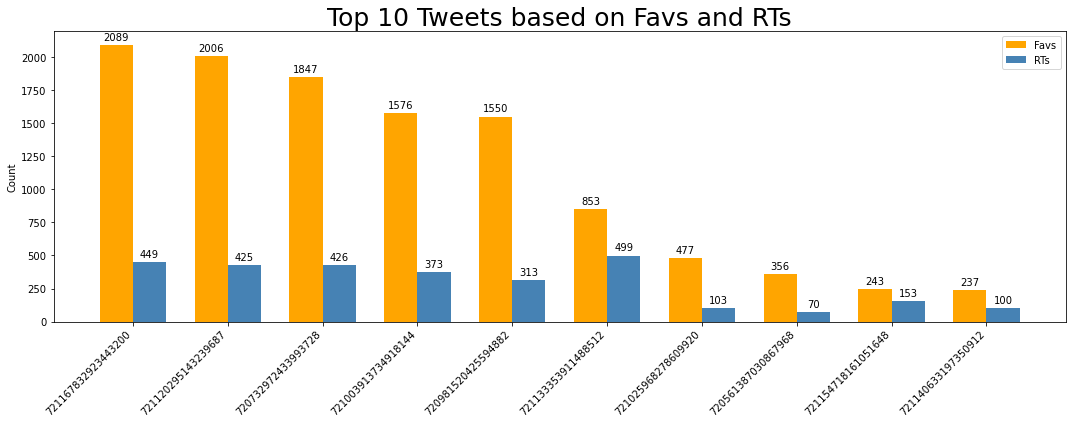

In [11]:
# Visualize
x = np.arange(len(df1_sorted['Tweet Id']))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15,6))
rects1 = ax.bar(x - width/2, df1_sorted.Favs, width, label='Favs', color = "orange")
rects2 = ax.bar(x + width/2, df1_sorted.RTs, width, label='RTs', color = "steelblue")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Top 10 Tweets based on Favs and RTs', fontsize=25)
ax.set_xticks(x, df1_sorted["Tweet Id"])
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

plt.xticks(rotation=45, ha = 'right')

fig.tight_layout()

plt.show()

### T1-2: Find the top 10 users. Users should be ranked based on the number of followers that they have.

In [12]:
df.columns

Index(['Tweet Id', 'Date', 'Hour', 'User Name', 'Nickname', 'Tweet content',
       'Favs', 'RTs', 'Latitude', 'Longitude', 'Followers'],
      dtype='object')

In [13]:
df["Nickname"].nunique()

85602

In [14]:
df["Nickname"].count()

204820

In [15]:
# create a subset
df2 = df[["Nickname","Followers"]]

In [16]:
df2.head(10)

,Nickname,Followers
0,BillSchulhoff,386.0
1,danipolis,812.0
2,KJacobs27,179.0
3,stncurtis,1229.0
4,wi_borzo,129.0
5,KirstinMerrell,497.0
6,Jkosches86,37.0
7,tmj_pa_retail,480.0
8,Vonfandango,36.0
9,tmj_bal_jobs,635.0


In [17]:
# Sort
df2_sorted = df2.sort_values('Followers', ascending=False)

In [18]:
# drop duplicates
df2_sorted.drop_duplicates(subset=['Nickname'],inplace=True)

In [20]:
# Take the Top 10 Users based on the number Followers
df2_sorted = df2_sorted.head(10)

In [21]:
df2_sorted

,Nickname,Followers
12161,werevertumorro,7232508.0
106965,joelmchale,3804447.0
168260,questlove,3627124.0
68071,itsgabrielleu,3043036.0
37377,AlfredoFlores,2742081.0
121716,maluma,2525716.0
69287,MatthewZiff,2139467.0
23535,PraFeBrum,2128396.0
133493,maxenemagalona,2031713.0
3498,iamdelafuente,1965579.0


#### Plot:

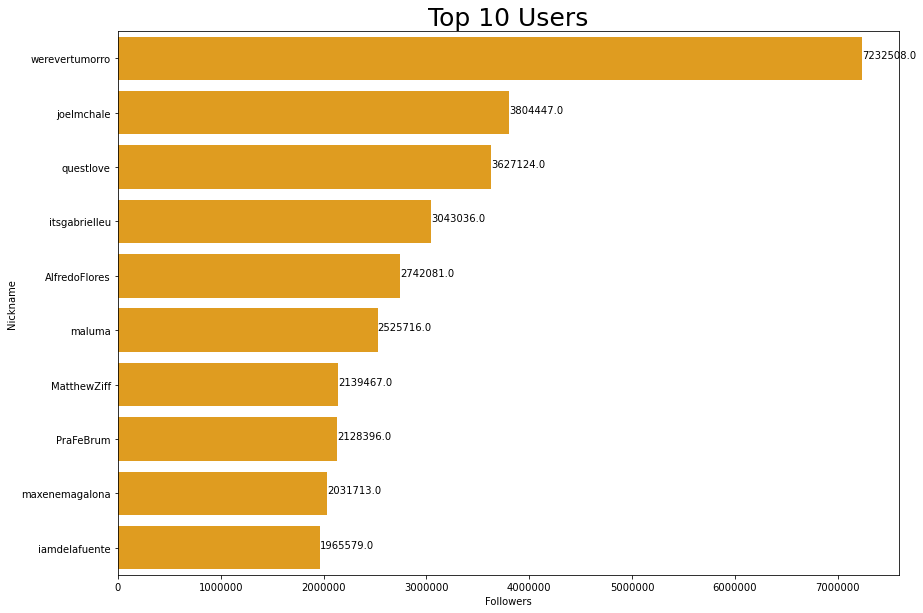

In [22]:
# Visualize 
# Set the figure size
plt.figure(figsize=(14, 10))

# plot a bar chart
ax = sns.barplot(
    y= "Nickname", 
    x= "Followers", 
    data= df2_sorted, 
    estimator=sum, 
    ci=None, 
    color='orange');



ax.set_title('Top 10 Users', fontsize=25)
plt.ticklabel_format(style='plain', axis='x')

# Add values next to the bars
for index, value in enumerate(df2_sorted["Followers"]):
    plt.text(value, index,
             str(value))



### T1-3: Draw a figure to show the number of tweets posted at different times of the day (i.e., 24 hours).

In [23]:
df.head(1)

,Tweet Id,Date,Hour,User Name,Nickname,Tweet content,Favs,RTs,Latitude,Longitude,Followers
0,721318437075685382,2016-04-16,12:44,Bill Schulhoff,BillSchulhoff,"Wind 3.2 mph NNE. Barometer 30.20 in, Rising s...",NaN,NaN,40.760278,-72.954722,386.0


In [24]:
df["Hour"].nunique()

1018

In [25]:
# Create a subset
df3 = df[["Tweet Id","Hour"]]

In [26]:
df3.head()

,Tweet Id,Hour
0,721318437075685382,12:44
1,721318436173979648,12:44
2,721318434169102336,12:44
3,721318429844582400,12:44
4,721318429081407488,12:44


In [27]:
df3.dtypes

Tweet Id     int64
Hour        object
dtype: object

In [28]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204820 entries, 0 to 204819
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Tweet Id  204820 non-null  int64 
 1   Hour      204820 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.1+ MB


In [29]:
df3["Hour"][:2]

0    12:44
1    12:44
Name: Hour, dtype: object

In [31]:
# Split the minutess and Hours:
df3[['hours', 'minutes']] = df3['Hour'].str.split(':', expand=True)

C:\Users\rcuza\AppData\Local\Temp\ipykernel_28728\2913973194.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[['hours', 'minutes']] = df3['Hour'].str.split(':', expand=True)
C:\Users\rcuza\AppData\Local\Temp\ipykernel_28728\2913973194.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[['hours', 'minutes']] = df3['Hour'].str.split(':', expand=True)


In [33]:
# Check
df3.head()

,Tweet Id,Hour,hours,minutes
0,721318437075685382,12:44,12,44
1,721318436173979648,12:44,12,44
2,721318434169102336,12:44,12,44
3,721318429844582400,12:44,12,44
4,721318429081407488,12:44,12,44


In [32]:
# Check
df3.tail()

,Tweet Id,Hour,hours,minutes
204815,720553451927646209,10:05,10,05
204816,720553447402160128,10:05,10,05
204817,720553447058092032,10:05,10,05
204818,720553446236155906,10:05,10,05
204819,720553437428101120,10:05,10,05


In [49]:
df3["hours"].unique()

array(['12', '11', '10', '09', '08', '07', '06', '05', '04', '03', '02',
       '01', '00', '23', '22', '21', '20', '19', '18', '17', '16', '15',
       '14', '13'], dtype=object)

In [34]:
# Groupby hours
df_Hours = df3.groupby("hours").count()

In [35]:
df_Hours.head(24)

,Tweet Id,Hour,minutes
hours,,,
00,18737,18737,18737
01,12325,12325,12325
02,10610,10610,10610
03,9907,9907,9907
04,4753,4753,4753
05,6360,6360,6360
06,2182,2182,2182
07,4537,4537,4537
08,3387,3387,3387


#### Plot:

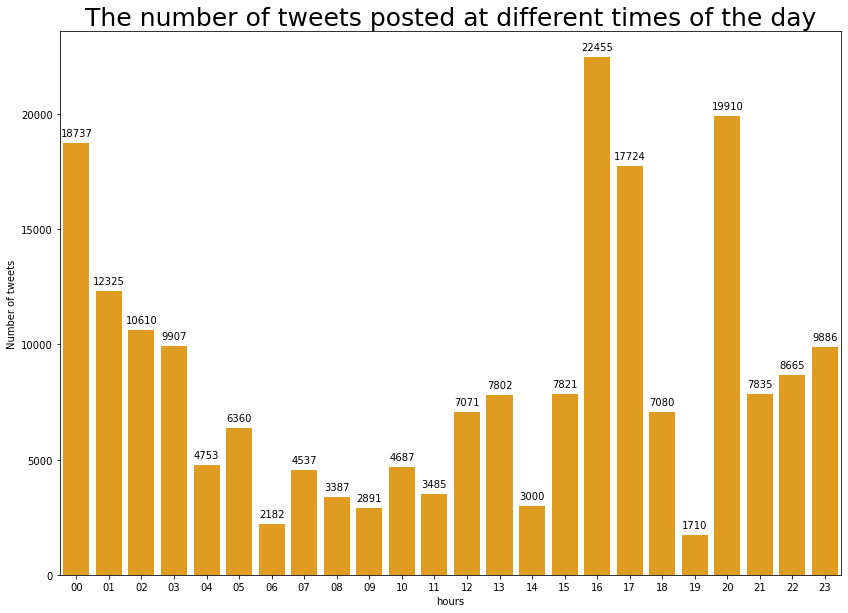

In [36]:
# Visualize
# Set the figure size
plt.figure(figsize=(14, 10))

# plot a bar chart
ax = sns.barplot(
    y= "Tweet Id", 
    x=df_Hours.index, 
    data= df_Hours, 
    estimator=sum, 
    ci=None, 
    color='orange');

ax.set_title('The number of tweets posted at different times of the day', fontsize=25)
ax.set_ylabel('Number of tweets')


for p in ax.patches:                 
    ax.annotate(np.round(p.get_height(),decimals=2),(p.get_x()+p.get_width()/2., p.get_height()),ha='center',va='center',xytext=(0, 10),textcoords='offset points')



### T1-4: Draw a figure to show the number of tweets posted from different locations (or states) in the US.

In [8]:
import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

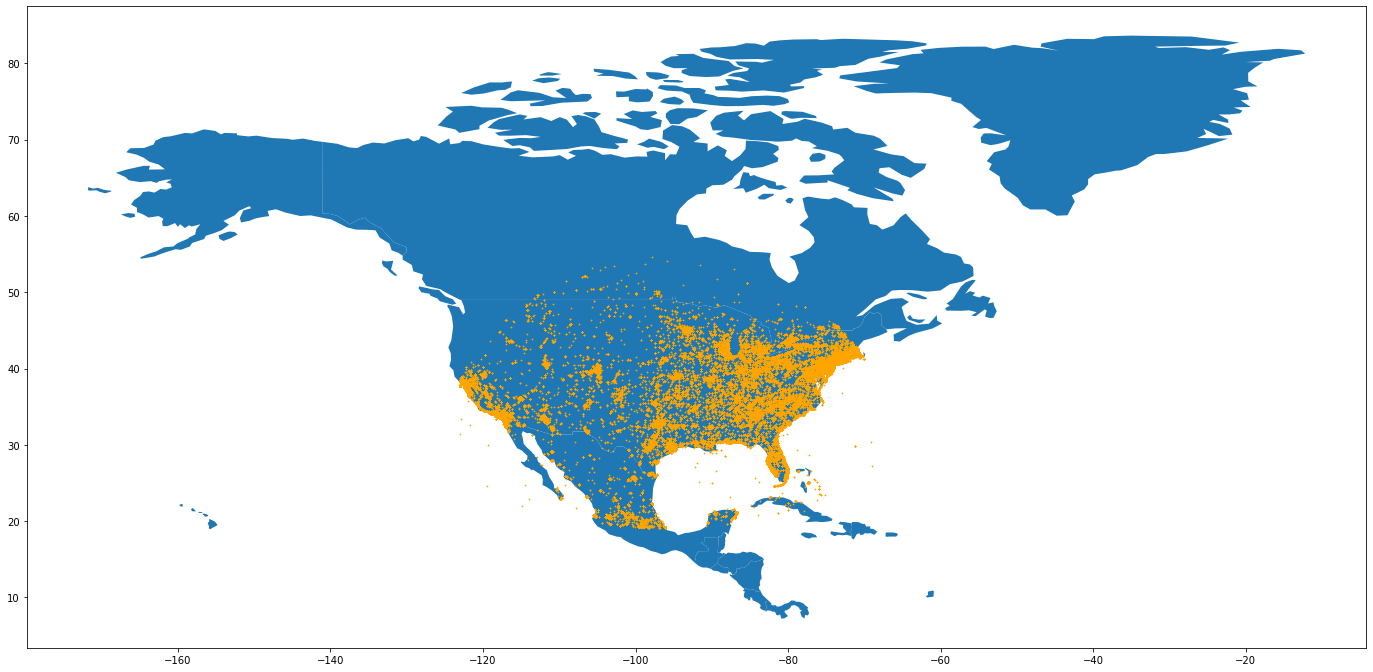

In [9]:
# Create a Geopandas datafram containing a new column "geometry" for coordinates
df_geo = gpd.GeoDataFrame(df , geometry= gpd.points_from_xy(df.Longitude, df.Latitude))

# Plot a world map with positions of each tweet 
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
North_America = world[world.continent == 'North America']
df_geo.plot(ax=North_America.plot(figsize=(24, 12)), marker='x', color='orange', markersize=0.6);

## T2 Data Cleaning and Pre-processing: 

In [38]:
df_to_clean = df.copy(deep=True)

In [39]:
df_to_clean.head()

,Tweet Id,Date,Hour,User Name,Nickname,Tweet content,Favs,RTs,Latitude,Longitude,Followers
0,721318437075685382,2016-04-16,12:44,Bill Schulhoff,BillSchulhoff,"Wind 3.2 mph NNE. Barometer 30.20 in, Rising s...",NaN,NaN,40.760278,-72.954722,386.0
1,721318436173979648,2016-04-16,12:44,Daniele Polis,danipolis,Pausa pro café antes de embarcar no próximo vô...,NaN,NaN,32.898349,-97.039196,812.0
2,721318434169102336,2016-04-16,12:44,Kasey Jacobs,KJacobs27,Good. Morning. #morning #Saturday #diner #VT #...,NaN,NaN,44.199476,-72.504173,179.0
3,721318429844582400,2016-04-16,12:44,Stan Curtis,stncurtis,@gratefuldead recordstoredayus 🌹🌹🌹 @ TOMS MUSI...,NaN,NaN,39.901474,-76.606817,1229.0
4,721318429081407488,2016-04-16,12:44,Dave Borzymowski,wi_borzo,Egg in a muffin!!! (@ Rocket Baby Bakery - @ro...,NaN,NaN,43.060849,-87.998309,129.0


In [40]:
# Checking for missing values in column 'Tweet content'
df_to_clean.isna().sum()

Tweet Id              0
Date                  0
Hour                  0
User Name             5
Nickname              0
Tweet content         0
Favs             195619
RTs              199604
Latitude              0
Longitude             0
Followers            61
dtype: int64

#### New:

#### T2-1: Raw tweets are highly unstructured and often contain redundant and problematic information. For instance, the links, emojis and symbols (e.g., #, @) in a tweet may not be necessary for the text mining tasks. Use R or Python to clean and pre-process raw tweets.

In [58]:
##nltk.download()

In [61]:
# Import libraries
import re
import gensim
import nltk
from nltk.corpus import stopwords
# importing 'WordNetLemmatizer' for the Lemmatization process
from nltk.stem import WordNetLemmatizer

In [44]:
# Function to remove URL
def remove_URL(text): 
    url = re.compile(r"https?://\S+|www\.\S+") 
    return url.sub(r"", text)


# Function to remove html                     
def remove_html(text): 
    html = re.compile(r"<.*?>") 
    return html.sub(r"", text)

df_to_clean["Tweet content_1"] = df_to_clean["Tweet content"].map(lambda x: remove_html(x))
df_to_clean["Tweet content_1"] = df_to_clean["Tweet content"].map(lambda x: remove_URL(x))


In [60]:
df_to_clean.head(2)

,Tweet Id,Date,Hour,User Name,Nickname,Tweet content,Favs,RTs,Latitude,Longitude,Followers,Tweet content_1,clean_tweets[Tokenized],Tokenized_NOstopwords,Lemmatized_clean_tweet
0,721318437075685382,2016-04-16,12:44,Bill Schulhoff,BillSchulhoff,"Wind 3.2 mph NNE. Barometer 30.20 in, Rising s...",NaN,NaN,40.760278,-72.954722,386.0,"Wind 3.2 mph NNE. Barometer 30.20 in, Rising s...","[wind, mph, nne, barometer, in, rising, slowly...","[wind, mph, nne, barometer, rising, slowly, te...","[wind, mph, nne, barometer, rising, slowly, te..."
1,721318436173979648,2016-04-16,12:44,Daniele Polis,danipolis,Pausa pro café antes de embarcar no próximo vô...,NaN,NaN,32.898349,-97.039196,812.0,Pausa pro café antes de embarcar no próximo vô...,"[pausa, pro, cafe, antes, de, embarcar, no, pr...","[pausa, pro, cafe, antes, de, embarcar, proxim...","[pausa, pro, cafe, ante, de, embarcar, proximo..."


In [415]:
df_to_clean["Tweet content"][2]

'Good. Morning. #morning #Saturday #diner #VT #breakfast #nucorpsofcadetsring #ring #college… https://t.co/dBZ7dbwX6f'

In [416]:
df_to_clean["Tweet content_1"][2]

'Good. Morning. #morning #Saturday #diner #VT #breakfast #nucorpsofcadetsring #ring #college… '

In [48]:
# Tokenize + remove emojis, punctuation, numbers, other meaningless expressions
df_to_clean['clean_tweets[Tokenized]']= df_to_clean["Tweet content_1"].apply(lambda x:gensim.utils.simple_preprocess(x , deacc=True))

In [49]:
df_to_clean.head(2)

,Tweet Id,Date,Hour,User Name,Nickname,Tweet content,Favs,RTs,Latitude,Longitude,Followers,Tweet content_1,clean_tweets[Tokenized]
0,721318437075685382,2016-04-16,12:44,Bill Schulhoff,BillSchulhoff,"Wind 3.2 mph NNE. Barometer 30.20 in, Rising s...",NaN,NaN,40.760278,-72.954722,386.0,"Wind 3.2 mph NNE. Barometer 30.20 in, Rising s...","[wind, mph, nne, barometer, in, rising, slowly..."
1,721318436173979648,2016-04-16,12:44,Daniele Polis,danipolis,Pausa pro café antes de embarcar no próximo vô...,NaN,NaN,32.898349,-97.039196,812.0,Pausa pro café antes de embarcar no próximo vô...,"[pausa, pro, cafe, antes, de, embarcar, no, pr..."


In [50]:
df_to_clean["Tweet content"][0]

'Wind 3.2 mph NNE. Barometer 30.20 in, Rising slowly. Temperature 49.3 °F. Rain today 0.00 in. Humidity 32%'

In [51]:
df_to_clean["Tweet content"][2]

'Good. Morning. #morning #Saturday #diner #VT #breakfast #nucorpsofcadetsring #ring #college… https://t.co/dBZ7dbwX6f'

In [53]:
df_to_clean["clean_tweets[Tokenized]"][0]

['wind',
 'mph',
 'nne',
 'barometer',
 'in',
 'rising',
 'slowly',
 'temperature',
 'rain',
 'today',
 'in',
 'humidity']

In [426]:
df_to_clean["clean_tweets[Tokenized]"][2]

['good',
 'morning',
 'morning',
 'saturday',
 'diner',
 'vt',
 'breakfast',
 'ring',
 'college']

#### T2-2: Apply necessary text mining preprocessing techniques, e.g., tokenization, stemming, stop word removal, etc.


#### Note: tokenization has already been performed in T2-1 alongside cleanning:


##### Remove stop words:

In [56]:
eng_stopwords = stopwords.words('english') 

df_to_clean['Tokenized_NOstopwords'] = df_to_clean['clean_tweets[Tokenized]'].apply(lambda words: [word for word in words if word not in eng_stopwords])

In [57]:
df_to_clean.head(2)

,Tweet Id,Date,Hour,User Name,Nickname,Tweet content,Favs,RTs,Latitude,Longitude,Followers,Tweet content_1,clean_tweets[Tokenized],Tokenized_NOstopwords
0,721318437075685382,2016-04-16,12:44,Bill Schulhoff,BillSchulhoff,"Wind 3.2 mph NNE. Barometer 30.20 in, Rising s...",NaN,NaN,40.760278,-72.954722,386.0,"Wind 3.2 mph NNE. Barometer 30.20 in, Rising s...","[wind, mph, nne, barometer, in, rising, slowly...","[wind, mph, nne, barometer, rising, slowly, te..."
1,721318436173979648,2016-04-16,12:44,Daniele Polis,danipolis,Pausa pro café antes de embarcar no próximo vô...,NaN,NaN,32.898349,-97.039196,812.0,Pausa pro café antes de embarcar no próximo vô...,"[pausa, pro, cafe, antes, de, embarcar, no, pr...","[pausa, pro, cafe, antes, de, embarcar, proxim..."


In [58]:
# Check 
df_to_clean["clean_tweets[Tokenized]"][0]

['wind',
 'mph',
 'nne',
 'barometer',
 'in',
 'rising',
 'slowly',
 'temperature',
 'rain',
 'today',
 'in',
 'humidity']

In [59]:
# Check ("in" is removed)
df_to_clean["Tokenized_NOstopwords"][0]

['wind',
 'mph',
 'nne',
 'barometer',
 'rising',
 'slowly',
 'temperature',
 'rain',
 'today',
 'humidity']

#### Lemmatization:

In [62]:
# Creating a function for Lemmatization
def Lemmatization(text):
    
    lemm_text = [WordNetLemmatizer().lemmatize(word, pos="v") for word in text]
    return lemm_text

df_to_clean['Lemmatized_clean_tweet'] = df_to_clean["Tokenized_NOstopwords"].apply(lambda x:Lemmatization(x))

In [63]:
df_to_clean.head(2)

,Tweet Id,Date,Hour,User Name,Nickname,Tweet content,Favs,RTs,Latitude,Longitude,Followers,Tweet content_1,clean_tweets[Tokenized],Tokenized_NOstopwords,Lemmatized_clean_tweet
0,721318437075685382,2016-04-16,12:44,Bill Schulhoff,BillSchulhoff,"Wind 3.2 mph NNE. Barometer 30.20 in, Rising s...",NaN,NaN,40.760278,-72.954722,386.0,"Wind 3.2 mph NNE. Barometer 30.20 in, Rising s...","[wind, mph, nne, barometer, in, rising, slowly...","[wind, mph, nne, barometer, rising, slowly, te...","[wind, mph, nne, barometer, rise, slowly, temp..."
1,721318436173979648,2016-04-16,12:44,Daniele Polis,danipolis,Pausa pro café antes de embarcar no próximo vô...,NaN,NaN,32.898349,-97.039196,812.0,Pausa pro café antes de embarcar no próximo vô...,"[pausa, pro, cafe, antes, de, embarcar, no, pr...","[pausa, pro, cafe, antes, de, embarcar, proxim...","[pausa, pro, cafe, ante, de, embarcar, proximo..."


In [64]:
df_to_clean["Tokenized_NOstopwords"][12]

['although', 'endorsing', 'candidate', 'thought']

In [65]:
df_to_clean['Lemmatized_clean_tweet'][12]

['although', 'endorse', 'candidate', 'think']

In [66]:
df_preprocessed = df_to_clean.copy(deep=True)

In [67]:
# Remove all the columns created while cleaning except the last one "Lemmatized_clean_tweet"
df_preprocessed.drop(["Tweet content_1", "clean_tweets[Tokenized]", "Tokenized_NOstopwords"], axis=1, inplace=True)

In [69]:
# Rename "Lemmatized_clean_tweet" as "preprocessed_tweets"
df_preprocessed.rename(columns={'Lemmatized_clean_tweet':'preprocessed_tweets'}, inplace=True)

In [72]:
# To remove
df_preprocessed["st_preprocessed_tweets"] = df_preprocessed["preprocessed_tweets"].map(lambda x: ' '.join(map(str, x)))

In [73]:
df_preprocessed.head(2)

,Tweet Id,Date,Hour,User Name,Nickname,Tweet content,Favs,RTs,Latitude,Longitude,Followers,preprocessed_tweets,st_preprocessed_tweets
0,721318437075685382,2016-04-16,12:44,Bill Schulhoff,BillSchulhoff,"Wind 3.2 mph NNE. Barometer 30.20 in, Rising s...",NaN,NaN,40.760278,-72.954722,386.0,"[wind, mph, nne, barometer, rise, slowly, temp...",wind mph nne barometer rise slowly temperature...
1,721318436173979648,2016-04-16,12:44,Daniele Polis,danipolis,Pausa pro café antes de embarcar no próximo vô...,NaN,NaN,32.898349,-97.039196,812.0,"[pausa, pro, cafe, ante, de, embarcar, proximo...",pausa pro cafe ante de embarcar proximo voo da...


### Bigram and Trigram:

In [78]:
# Gather all preprocessed tweets into one big array
tweets_Copy = df_preprocessed.preprocessed_tweets.values.tolist()

In [79]:
tweets_Copy[0:2]

[['wind',
  'mph',
  'nne',
  'barometer',
  'rise',
  'slowly',
  'temperature',
  'rain',
  'today',
  'humidity'],
 ['pausa',
  'pro',
  'cafe',
  'ante',
  'de',
  'embarcar',
  'proximo',
  'voo',
  'danipolisviaja',
  'pause']]

In [81]:
# Making bigrams and trigrams:
bigram_phrases = gensim.models.Phrases(tweets_Copy, min_count=5, threshold=50)
trigram_phrases = gensim.models.Phrases(bigram_phrases[tweets_Copy], threshold=50)

bigram= gensim.models.phrases.Phraser(bigram_phrases)
trigram= gensim.models.phrases.Phraser(trigram_phrases)

# Function to make bigrams
def make_bigrams(texts):
    return ([bigram[doc] for doc in texts])                       
# Function to make trigrams
def make_trigram(texts):
    return ([trigram[bigram[doc]] for doc in texts])

data_bigrams = make_bigrams(tweets_Copy)
data_bigrams_trigrams = make_trigram(data_bigrams)

print(data_bigrams_trigrams)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [82]:
tweets_Copy[151]

['spring', 'come', 'nypl', 'nypl', 'new', 'york', 'public', 'library']

In [84]:
data_bigrams_trigrams[151]

['spring', 'come', 'nypl', 'nypl_new_york', 'public_library']

## T3 Data Processing and Analysis: 

### Text modelling [LDA]: [Real]

In [87]:
import gensim.corpora as corpora
from pprint import pprint
import time

In [85]:
# Create Dictionary
id2word = corpora.Dictionary(data_bigrams_trigrams)
# Create Corpus
texts = data_bigrams_trigrams
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[0:30])

[[(0, 1), (1, 1), (2, 1)], [(3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1)], [(12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1)], [(20, 1), (21, 1), (22, 1), (23, 1)], [(24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1)], [(31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1)], [(41, 1), (42, 2), (43, 1)], [(44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1)], [(53, 1), (54, 1), (55, 1)], [(46, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 2), (61, 1)], [(46, 1), (51, 1), (60, 2), (62, 1), (63, 1), (64, 1), (65, 1)], [(66, 1), (67, 1), (68, 1), (69, 1), (70, 1)], [(71, 1), (72, 1), (73, 1), (74, 1)], [(74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1)], [(46, 1), (48, 1), (60, 2), (62, 1), (81, 1), (82, 1), (83, 1), (84, 1)], [(46, 1), (48, 1), (60, 2), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1)], [(88, 1), (89, 1)], [(46, 1), (60, 2), (90, 1), (91, 1), (9

#### LDA (K=10):

In [88]:
# Calculate running time
start_time = time.time()
# This LDA models has 10 as number of topics
lda_model_10 = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10)


print("The execution time: %s seconds" % (time.time() - start_time))

The execution time: 26.819631814956665 seconds


In [89]:
# Print the Keyword in the 10 topics
pprint(lda_model_10.print_topics())
doc_lda = lda_model_10[corpus]

[(0,
  '0.011*"tbt" + 0.007*"city" + 0.006*"get" + 0.005*"one" + 0.005*"best" + '
  '0.004*"drink" + 0.004*"beach" + 0.004*"work" + 0.004*"hire" + '
  '0.003*"recommend_anyone_job"'),
 (1,
  '0.192*"job" + 0.113*"hire" + 0.062*"careerarc" + 0.029*"open" + '
  '0.023*"retail" + 0.018*"hospitality" + 0.016*"sales" + 0.016*"want_work" + '
  '0.011*"healthcare" + 0.011*"view_latest"'),
 (2,
  '0.013*"get" + 0.012*"day" + 0.010*"amp" + 0.006*"one" + 0.005*"today" + '
  '0.005*"come" + 0.005*"love" + 0.004*"california" + 0.004*"time" + '
  '0.004*"de"'),
 (3,
  '0.032*"near" + 0.032*"interest" + 0.027*"could_great_fit" + 0.013*"job" + '
  '0.011*"hire" + 0.009*"la" + 0.009*"de" + 0.008*"amp" + 0.007*"tonight" + '
  '0.006*"come"'),
 (4,
  '0.015*"de" + 0.009*"mexico" + 0.008*"la" + 0.007*"el" + 0.007*"drink" + '
  '0.007*"que" + 0.006*"love" + 0.006*"go" + 0.006*"photo" + 0.005*"good"'),
 (5,
  '0.006*"thank" + 0.006*"go" + 0.006*"amp" + 0.005*"today" + 0.005*"time" + '
  '0.005*"job" + 0.00

#### LDA(k=5):

In [90]:
# Calculate running time
start_time = time.time()

# This LDA models has 5 as number of topics
lda_model_5 = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=5)

print("The execution time: %s seconds" % (time.time() - start_time))

The execution time: 29.644028425216675 seconds


In [92]:
# Print the Keyword in each of the 5 topics
pprint(lda_model_5.print_topics())
doc_lda_5 = lda_model_5[corpus]

[(0,
  '0.139*"job" + 0.076*"hire" + 0.038*"careerarc" + 0.024*"open" + '
  '0.014*"want_work" + 0.013*"hospitality" + 0.011*"retail" + '
  '0.009*"view_latest" + 0.009*"nurse" + 0.009*"healthcare"'),
 (1,
  '0.013*"get" + 0.006*"day" + 0.006*"love" + 0.006*"time" + 0.006*"go" + '
  '0.005*"today" + 0.005*"come" + 0.005*"work" + 0.005*"one" + 0.005*"thank"'),
 (2,
  '0.057*"hire" + 0.052*"job" + 0.028*"careerarc" + 0.021*"sales" + '
  '0.017*"retail" + 0.016*"see" + 0.015*"near" + 0.015*"latest" + '
  '0.015*"interest" + 0.014*"job_click_apply"'),
 (3,
  '0.014*"amp" + 0.005*"job" + 0.004*"today" + 0.004*"day" + 0.004*"love" + '
  '0.004*"new" + 0.003*"go" + 0.003*"park" + 0.003*"hire" + 0.003*"tonight"'),
 (4,
  '0.023*"de" + 0.013*"la" + 0.007*"que" + 0.006*"en" + 0.006*"post_photo" + '
  '0.006*"el" + 0.005*"mexico" + 0.004*"ca" + 0.004*"con" + 0.004*"drink"')]


#### Visualization for K=10,5:

In [93]:
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis

In [94]:
# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_prepared_10 = pyLDAvis.gensim_models.prepare(lda_model_10, corpus, id2word)
LDAvis_prepared_10

C:\Users\rcuza\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.365021 -0.065938       1        1  23.771431
2      0.128579 -0.020279       2        1  12.616720
4      0.082389 -0.079781       3        1   9.421379
8      0.099820  0.051418       4        1   8.723337
5      0.069659  0.030949       5        1   8.441935
0      0.066233  0.044168       6        1   7.673065
6     -0.162693  0.167248       7        1   7.645553
9      0.077727  0.031115       8        1   7.488355
3      0.002412 -0.110876       9        1   7.471176
7      0.000894 -0.048024      10        1   6.747049, topic_info=          Term          Freq         Total Category  logprob  loglift
60         job  68291.000000  68291.000000  Default  30.0000  30.0000
46        hire  44504.000000  44504.000000  Default  29.0000  29.0000
62   careerarc  21950.000000  21950.000000  Default  28.0000  28.0000
124     latest   3893.000000   3893.000000  Default  27.0000  27.0000
263   interest   3729.000000   3729.000000  Default  26.0000  26.0000
..         ...           ...           ...      ...      ...      ...
659        que    206.095156   1918.427928  Topic10  -6.1218   0.4651
51      retail    245.965370   8629.367404  Topic10  -5.9450  -0.8617
600        new    215.372306   3162.904885  Topic10  -6.0778   0.0092
48        open    240.580337  11638.402594  Topic10  -5.9671  -1.1829
128        see    199.883894   5609.576547  Topic10  -6.1524  -0.6384

[838 rows x 6 columns], token_table=       Topic      Freq            Term
term                                  
7389       9  0.966289  aboutlastnight
3302       9  0.976907      aca_talent
3698       3  0.101668         academy
3698       5  0.724387         academy
3698       6  0.019063         academy
...      ...       ...             ...
20081      9  0.070631             yep
20081     10  0.011772             yep
9196       6  0.964485            ymca
9196       9  0.015070            ymca
26446      4  0.964275           zumba

[3041 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 5, 9, 6, 1, 7, 10, 4, 8])

In [95]:
LDAvis_prepared_5 = pyLDAvis.gensim_models.prepare(lda_model_5, corpus, id2word)
LDAvis_prepared_5

C:\Users\rcuza\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.125403 -0.114384       1        1  27.890019
0     -0.217705 -0.006728       2        1  24.931425
4      0.166282  0.154159       3        1  16.310223
3      0.088550 -0.072190       4        1  15.613064
2     -0.162531  0.039143       5        1  15.255269, topic_info=             Term          Freq         Total Category  logprob  loglift
60            job  60907.000000  60907.000000  Default  30.0000  30.0000
46           hire  39614.000000  39614.000000  Default  29.0000  29.0000
62      careerarc  19349.000000  19349.000000  Default  28.0000  28.0000
268            de   5935.000000   5935.000000  Default  27.0000  27.0000
120         sales   5227.000000   5227.000000  Default  26.0000  26.0000
...           ...           ...           ...      ...      ...      ...
125   manufacture    513.809802   1421.040683   Topic5  -6.0241   0.8630
103            ca    579.380857   2450.065218   Topic5  -5.9040   0.4383
4826   california    476.042831   1234.125463   Topic5  -6.1005   0.9276
91       engineer    476.054005   1453.317069   Topic5  -6.1004   0.7642
82     healthcare    517.476736   3867.865599   Topic5  -6.0170  -0.1312

[434 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
5812      1  0.116638   accident
5812      2  0.085828   accident
5812      3  0.092430   accident
5812      4  0.578788   accident
5812      5  0.127641   accident
...     ...       ...        ...
1783      3  0.074001  yesterday
1783      4  0.037000  yesterday
1783      5  0.006529  yesterday
9196      1  0.973886       ymca
9196      4  0.022649       ymca

[1112 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 5, 4, 3])

#### Evaluation for LDA (K=10,5):

In [97]:
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda_10 = CoherenceModel(model=lda_model_10, texts=data_bigrams_trigrams, dictionary=id2word, coherence='c_v')
coherence_lda_10 = coherence_model_lda_10.get_coherence()
print('Coherence Score for LDA with 1O Topics: ', coherence_lda_10)

Coherence Score for LDA with 1O Topics:  0.358526780018442


In [98]:
# Compute Coherence Score for model lda_model_5
coherence_model_lda_5 = CoherenceModel(model=lda_model_5, texts=data_bigrams_trigrams, dictionary=id2word, coherence='c_v')
coherence_lda_5 = coherence_model_lda_5.get_coherence()
print('Coherence Score for LDA with 5 Topics: ', coherence_lda_5)

Coherence Score for LDA with 5 Topics:  0.32861859195774823


### Text modelling [GSDMM]:[Real]

In [167]:
# Install the gsdmm liberary from Github
# pip install https://github.com/rwalk/gsdmm/tarball/master

In [100]:
# Import relevent liberaries
#import pickle
import gsdmm
from gsdmm import MovieGroupProcess


#### STTM (Number of topics K=10):

##### STTM_10_a: alpha=0.1, beta=0.1, n_iters=5:

In [125]:
# Calculate running time
start_time = time.time()

# train STTM model
STTM_10_a = MovieGroupProcess(K=10, alpha=0.1, beta=0.1, n_iters=5)
vocab = set(x for doc in data_bigrams_trigrams for x in doc)
n_terms = len(vocab)

print("The execution time: %s seconds (%s minutes)" % ((time.time() - start_time),(time.time() - start_time)/60))



The execution time: 0.22452616691589355 seconds (0.003742102781931559 minutes)


In [126]:
# Calculate running time
start_time = time.time()

# Fit STTM model
y_10_a = STTM_10_a.fit(data_bigrams_trigrams, n_terms)

print("The execution time: %s seconds (%s minutes)" % ((time.time() - start_time),(time.time() - start_time)/60))



In stage 0: transferred 169936 clusters with 10 clusters populated
In stage 1: transferred 124607 clusters with 10 clusters populated
In stage 2: transferred 71495 clusters with 10 clusters populated
In stage 3: transferred 50967 clusters with 10 clusters populated
In stage 4: transferred 41423 clusters with 10 clusters populated
The execution time: 194.0260956287384 seconds (3.2337682604789735 minutes)


In [127]:
# helper function
def top_words(cluster_word_distribution, top_cluster, values):
    '''prints the top words in each cluster'''
    for cluster in top_cluster:
        sort_dicts =sorted(STTM_10_a.cluster_word_distribution[cluster].items(), key=lambda k: k[1], reverse=True)[:values]
        print('Cluster %s : %s'%(cluster,sort_dicts))
        print(' — — — — — — — — —')

In [128]:
doc_count = np.array(STTM_10_a.cluster_doc_count)
print("Number of tweets per topic :", doc_count)
print("*"*20)
# topics sorted by the number of documents they are allocated to
top_index = doc_count.argsort()[-10:][::-1]
print("Most important clusters (by number of tweets inside):",   
       top_index)
print("*"*20)
# show the top 5 words in term frequency for each cluster 
topic_indices = np.arange(start=0, stop=len(doc_count), step=1)
top_words(STTM_10_a.cluster_word_distribution, topic_indices, 10)

Number of tweets per topic : [26401 13845  8748 33586 20057  5089 15250 13743 29887 38214]
********************
Most important clusters (by number of tweets inside): [9 3 8 0 4 6 1 7 2 5]
********************
Cluster 0 : [('job', 34058), ('hire', 22705), ('careerarc', 12624), ('open', 6075), ('hospitality', 5981), ('want_work', 5099), ('near', 3683), ('view_latest', 3682), ('interest', 3681), ('could_great_fit', 3174)]
 — — — — — — — — —
Cluster 1 : [('amp', 500), ('get', 478), ('love', 422), ('new', 381), ('today', 333), ('go', 320), ('tonight', 313), ('thank', 281), ('time', 280), ('day', 280)]
 — — — — — — — — —
Cluster 2 : [('rd', 523), ('realestate', 515), ('traffic', 503), ('st', 479), ('accident', 377), ('sb', 330), ('stop_go', 322), ('dr', 313), ('nb', 301), ('amp', 284)]
 — — — — — — — — —
Cluster 3 : [('job', 34043), ('hire', 21942), ('careerarc', 9224), ('retail', 5623), ('sales', 5052), ('open', 4528), ('nurse', 4039), ('latest', 3782), ('see', 3610), ('job_click_apply', 35

##### STTM_10_b: alpha=0.1, beta=0.5, n_iters=10:

In [129]:
# Calculate running time
start_time = time.time()

# train STTM model
STTM_10_b = MovieGroupProcess(K=10, alpha=0.1, beta=0.5, n_iters=10)
vocab = set(x for doc in data_bigrams_trigrams for x in doc)
n_terms = len(vocab)

print("The execution time: %s seconds (%s minutes)" % ((time.time() - start_time),(time.time() - start_time)/60))



The execution time: 0.23997259140014648 seconds (0.003999543190002441 minutes)


In [130]:
# Calculate running time
start_time = time.time()

# Fit STTM model
y_10_b = STTM_10_b.fit(data_bigrams_trigrams, n_terms)

print("The execution time: %s seconds (%s minutes)" % ((time.time() - start_time),(time.time() - start_time)/60))



In stage 0: transferred 176347 clusters with 10 clusters populated
In stage 1: transferred 134541 clusters with 10 clusters populated
In stage 2: transferred 64578 clusters with 10 clusters populated
In stage 3: transferred 42098 clusters with 10 clusters populated
In stage 4: transferred 31519 clusters with 10 clusters populated
In stage 5: transferred 25551 clusters with 10 clusters populated
In stage 6: transferred 22128 clusters with 10 clusters populated
In stage 7: transferred 19904 clusters with 10 clusters populated
In stage 8: transferred 18911 clusters with 10 clusters populated
In stage 9: transferred 17869 clusters with 10 clusters populated
The execution time: 369.9842879772186 seconds (6.16640479962031 minutes)


In [131]:
doc_count = np.array(STTM_10_b.cluster_doc_count)
print("Number of tweets per topic :", doc_count)
print("*"*20)
# topics sorted by the number of documents they are allocated to
top_index = doc_count.argsort()[-10:][::-1]
print("Most important clusters (by number of tweets inside):",   
       top_index)
print("*"*20)
# show the top 5 words in term frequency for each cluster 
topic_indices = np.arange(start=0, stop=len(doc_count), step=1)
top_words(STTM_10_b.cluster_word_distribution, topic_indices, 10)

Number of tweets per topic : [ 9301 87437   292 10620 15410 60079   381 20761   446    93]
********************
Most important clusters (by number of tweets inside): [1 5 7 4 3 0 8 6 2 9]
********************
Cluster 0 : [('job', 34058), ('hire', 22705), ('careerarc', 12624), ('open', 6075), ('hospitality', 5981), ('want_work', 5099), ('near', 3683), ('view_latest', 3682), ('interest', 3681), ('could_great_fit', 3174)]
 — — — — — — — — —
Cluster 1 : [('amp', 500), ('get', 478), ('love', 422), ('new', 381), ('today', 333), ('go', 320), ('tonight', 313), ('thank', 281), ('time', 280), ('day', 280)]
 — — — — — — — — —
Cluster 2 : [('rd', 523), ('realestate', 515), ('traffic', 503), ('st', 479), ('accident', 377), ('sb', 330), ('stop_go', 322), ('dr', 313), ('nb', 301), ('amp', 284)]
 — — — — — — — — —
Cluster 3 : [('job', 34043), ('hire', 21942), ('careerarc', 9224), ('retail', 5623), ('sales', 5052), ('open', 4528), ('nurse', 4039), ('latest', 3782), ('see', 3610), ('job_click_apply', 35

#### STTM (Number of topics K=5):

##### STTM_5_a: alpha=0.1, beta=0.1, n_iters=5:

In [132]:
start_time = time.time()

# train STTM model
STTM_5_a = MovieGroupProcess(K=5, alpha=0.1, beta=0.1, n_iters=5)
vocab = set(x for doc in data_bigrams_trigrams for x in doc)
n_terms = len(vocab)

print("The execution time: %s seconds (%s minutes)" % ((time.time() - start_time),(time.time() - start_time)/60))



The execution time: 0.22640109062194824 seconds (0.003773351510365804 minutes)


In [133]:
# Calculate running time
start_time = time.time()

# Fit STTM model
y_5 = STTM_5_a.fit(tweets_Copy, n_terms)

print("The execution time: %s seconds (%s minutes)" % ((time.time() - start_time),(time.time() - start_time)/60))



In stage 0: transferred 151679 clusters with 5 clusters populated
In stage 1: transferred 102634 clusters with 5 clusters populated
In stage 2: transferred 48251 clusters with 5 clusters populated
In stage 3: transferred 30708 clusters with 5 clusters populated
In stage 4: transferred 23301 clusters with 5 clusters populated
The execution time: 124.50878548622131 seconds (2.075146424770355 minutes)


In [134]:
doc_count = np.array(STTM_5_a.cluster_doc_count)
print("Number of tweets per topic :", doc_count)
print("*"*20)
# topics sorted by the number of documents they are allocated to
top_index = doc_count.argsort()[-10:][::-1]
print("Most important clusters (by number of tweets inside):",   
       top_index)
print("*"*20)
# show the top 10 words in term frequency for each cluster 
topic_indices = np.arange(start=0, stop=len(doc_count), step=1)
top_words(STTM_5_a.cluster_word_distribution, topic_indices, 10)

Number of tweets per topic : [23893 22564 59420 36524 62419]
********************
Most important clusters (by number of tweets inside): [4 2 3 0 1]
********************
Cluster 0 : [('job', 34058), ('hire', 22705), ('careerarc', 12624), ('open', 6075), ('hospitality', 5981), ('want_work', 5099), ('near', 3683), ('view_latest', 3682), ('interest', 3681), ('could_great_fit', 3174)]
 — — — — — — — — —
Cluster 1 : [('amp', 500), ('get', 478), ('love', 422), ('new', 381), ('today', 333), ('go', 320), ('tonight', 313), ('thank', 281), ('time', 280), ('day', 280)]
 — — — — — — — — —
Cluster 2 : [('rd', 523), ('realestate', 515), ('traffic', 503), ('st', 479), ('accident', 377), ('sb', 330), ('stop_go', 322), ('dr', 313), ('nb', 301), ('amp', 284)]
 — — — — — — — — —
Cluster 3 : [('job', 34043), ('hire', 21942), ('careerarc', 9224), ('retail', 5623), ('sales', 5052), ('open', 4528), ('nurse', 4039), ('latest', 3782), ('see', 3610), ('job_click_apply', 3565)]
 — — — — — — — — —
Cluster 4 : [('d

##### STTM_5_b: alpha=0.1, beta=0.5, n_iters=10:

In [135]:
# Calculate running time
start_time = time.time()

# train STTM model
STTM_5_b = MovieGroupProcess(K=5, alpha=0.1, beta=0.5, n_iters=10)
vocab = set(x for doc in data_bigrams_trigrams for x in doc)
n_terms = len(vocab)

print("The execution time: %s seconds (%s minutes)" % ((time.time() - start_time),(time.time() - start_time)/60))



The execution time: 0.2382984161376953 seconds (0.0039716402689615885 minutes)


In [136]:
# Calculate running time
start_time = time.time()

# Fit STTM model
y_5_b = STTM_5_b.fit(data_bigrams_trigrams, n_terms)

print("The execution time: %s seconds (%s minutes)" % ((time.time() - start_time),(time.time() - start_time)/60))



In stage 0: transferred 154741 clusters with 5 clusters populated
In stage 1: transferred 113262 clusters with 5 clusters populated
In stage 2: transferred 50581 clusters with 5 clusters populated
In stage 3: transferred 25865 clusters with 5 clusters populated
In stage 4: transferred 16915 clusters with 5 clusters populated
In stage 5: transferred 13768 clusters with 5 clusters populated
In stage 6: transferred 12404 clusters with 5 clusters populated
In stage 7: transferred 11808 clusters with 5 clusters populated
In stage 8: transferred 11526 clusters with 5 clusters populated
In stage 9: transferred 11260 clusters with 5 clusters populated
The execution time: 216.73075675964355 seconds (3.6121792793273926 minutes)


In [137]:
doc_count = np.array(STTM_5_b.cluster_doc_count)
print("Number of tweets per topic :", doc_count)
print("*"*20)
# topics sorted by the number of documents they are allocated to
top_index = doc_count.argsort()[-10:][::-1]
print("Most important clusters (by number of tweets inside):",   
       top_index)
print("*"*20)
# show the top 10 words in term frequency for each cluster 
topic_indices = np.arange(start=0, stop=len(doc_count), step=1)
top_words(STTM_5_b.cluster_word_distribution, topic_indices, 10)

Number of tweets per topic : [ 19418 100512  60055   2195  22640]
********************
Most important clusters (by number of tweets inside): [1 2 4 0 3]
********************
Cluster 0 : [('job', 34058), ('hire', 22705), ('careerarc', 12624), ('open', 6075), ('hospitality', 5981), ('want_work', 5099), ('near', 3683), ('view_latest', 3682), ('interest', 3681), ('could_great_fit', 3174)]
 — — — — — — — — —
Cluster 1 : [('amp', 500), ('get', 478), ('love', 422), ('new', 381), ('today', 333), ('go', 320), ('tonight', 313), ('thank', 281), ('time', 280), ('day', 280)]
 — — — — — — — — —
Cluster 2 : [('rd', 523), ('realestate', 515), ('traffic', 503), ('st', 479), ('accident', 377), ('sb', 330), ('stop_go', 322), ('dr', 313), ('nb', 301), ('amp', 284)]
 — — — — — — — — —
Cluster 3 : [('job', 34043), ('hire', 21942), ('careerarc', 9224), ('retail', 5623), ('sales', 5052), ('open', 4528), ('nurse', 4039), ('latest', 3782), ('see', 3610), ('job_click_apply', 3565)]
 — — — — — — — — —
Cluster 4 :

In [138]:
# define function to get words in topics. Credit to: https://towardsdatascience.com/short-text-topic-modelling-lda-vs-gsdmm-20f1db742e14
def get_topics_lists(model, top_clusters, n_words):
    '''
    Gets lists of words in topics as a list of lists.
    
    model: gsdmm instance
    top_clusters:  numpy array containing indices of top_clusters
    n_words: top n number of words to include
    
    '''
    # create empty list to contain topics
    topics = []
    
    # iterate over top n clusters
    for cluster in top_clusters:
        #create sorted dictionary of word distributions
        sorted_dict = sorted(model.cluster_word_distribution[cluster].items(), key=lambda k: k[1], reverse=True)[:n_words]
         
        #create empty list to contain words
        topic = []
        
        #iterate over top n words in topic
        for k,v in sorted_dict:
            #append words to topic list
            topic.append(k)
            
        #append topics to topics list    
        topics.append(topic)
    
    return topics



In [139]:
# get topics to feed to coherence model
topics = get_topics_lists(STTM_10_a, top_index, 20) 

# evaluate model using Topic Coherence score
cm_STTM_10_a = CoherenceModel(topics=topics, 
                          dictionary=id2word, 
                          corpus=corpus, 
                          texts=data_bigrams_trigrams, 
                          coherence='c_v')

# get coherence value
coherence_STTM_10_a = cm_STTM_10_a.get_coherence()  

print('Coherence Score for STTM_10_a: ', coherence_STTM_10_a)

Coherence Score for STTM_10_a:  0.4615009029653324


In [140]:
# get topics to feed to coherence model
topics = get_topics_lists(STTM_10_b, top_index, 20) 

# evaluate model using Topic Coherence score
cm_STTM_10_b = CoherenceModel(topics=topics, 
                          dictionary=id2word, 
                          corpus=corpus, 
                          texts=data_bigrams_trigrams, 
                          coherence='c_v')

# get coherence value
coherence_STTM_10_b = cm_STTM_10_b.get_coherence()  

print('Coherence Score for STTM_10_b: ', coherence_STTM_10_b)

Coherence Score for STTM_10_b:  0.4062248973937187


In [141]:
# get topics to feed to coherence model
topics = get_topics_lists(STTM_5_a, top_index, 20) 

# evaluate model using Topic Coherence score
cm_STTM_5_a = CoherenceModel(topics=topics, 
                          dictionary=id2word, 
                          corpus=corpus, 
                          texts=data_bigrams_trigrams, 
                          coherence='c_v')

# get coherence value
coherence_STTM_5_a = cm_STTM_5_a.get_coherence()  

print('Coherence Score for STTM_5_a: ', coherence_STTM_5_a)

Coherence Score for STTM_5_a:  0.4053044747527451


In [142]:
# get topics to feed to coherence model
topics = get_topics_lists(STTM_5_b, top_index, 20) 

# evaluate model using Topic Coherence score
cm_STTM_5_b = CoherenceModel(topics=topics, 
                          dictionary=id2word, 
                          corpus=corpus, 
                          texts=data_bigrams_trigrams, 
                          coherence='c_v')

# get coherence value
coherence_STTM_5_b = cm_STTM_5_b.get_coherence()  

print('Coherence Score for STTM_5_b: ', coherence_STTM_5_b)

Coherence Score for STTM_5_b:  0.4429893487321637


### End